In [18]:
# import osmnx
import osmnx as ox
import geopandas as gpd
import geodatasets as gd

# Specify the area of interest
place_name = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-0.11383 51.51826, -0.11380 51.51812...",51.523312,51.506871,-0.072762,-0.11383,259210805,relation,51800,51.515618,-0.091998,boundary,administrative,12,0.656625,city,City of London,"City of London, Greater London, England, Unite..."


<Axes: >

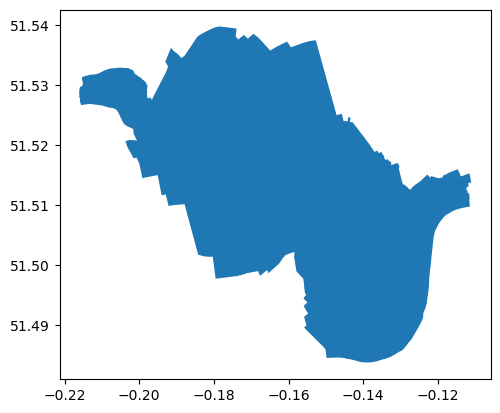

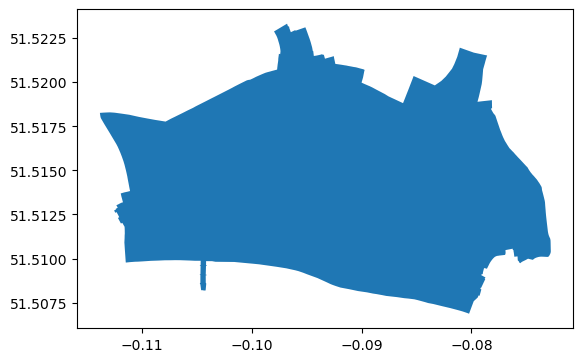

In [19]:
# import osmnx
import osmnx as ox
import geopandas as gpd

# Specify the area of interest
Westminster = "Westminster, England, UK"
City = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(Westminster)
area2 = ox.geocode_to_gdf(City)

area.plot()
area2.plot()



In [20]:
# List key-value pairs for tags
tags = {'tourism': "attraction"}   

attractionsCity = ox.features_from_place(City, tags)
attractionsWest = ox.features_from_place(Westminster, tags)
attractionsCity.head()
attractionsWest.head()
print(attractionsCity.columns.tolist())
print(attractionsWest.columns.tolist())

['geometry', 'addr:city', 'addr:country', 'addr:housenumber', 'addr:street', 'source', 'amenity', 'name', 'level', 'wheelchair', 'tourism', 'description', 'nodes', 'addr:housename', 'addr:postcode', 'alt_name', 'architect', 'building', 'building:colour', 'building:levels', 'building:material', 'building:shape', 'height', 'loc_name', 'name:en', 'name:es', 'name:ko', 'name:uk', 'note', 'roof:colour', 'roof:height', 'roof:material', 'roof:shape', 'start_date', 'use', 'website', 'wikidata', 'wikipedia', 'access', 'building:architecture', 'churchmanship', 'denomination', 'diocese', 'heritage', 'heritage:operator', 'heritage:website', 'historic', 'inscription_date', 'listed_status', 'opening_hours', 'ref:GB:nhle', 'ref:dove', 'religion', 'source:heritage', 'architect:wikidata', 'deanery', 'fax', 'parish', 'phone', 'year_of_construction', 'building:part', 'dedication:wikidata', 'name:af', 'name:fr', 'name:he', 'name:ja', 'name:la', 'name:lt', 'name:pl', 'name:zh', 'payment:cash', 'payment:mas

In [21]:
# import pandas as pd
# tags = {'tourism': "attraction"} 
# # Specify the area of interest
# place_name = "Greater London, England, UK"

# # Get place boundary related to the place name as a geodataframe
# greaterLondon = ox.geocode_to_gdf(place_name)
# attractionsGreaterLondon = attractionsCity = ox.features_from_place(place_name, tags)
# attractionsGreaterLondon=attractionsGreaterLondon[["name", "geometry"]]

# df_attractionsGreaterLondon = pd.DataFrame(attractionsGreaterLondon) 
# df_attractionsGreaterLondon.to_csv('attractionsGreaterLondon.csv', index=False, sep = ",") 

In [22]:
attractionsWest = attractionsWest[["name", "geometry"]]
attractionsCity = attractionsCity[["name", "geometry"]]
#attractions.merge(attractionsCity[["name", "geometry"]])
#attractions = gd.concat([attractionsWest, attractionsCity])
attractionsWest = attractionsWest.drop_duplicates(subset=['name'])
attractions_West = attractionsWest[attractionsWest['name'].notnull()]
attractionsCity = attractionsCity.drop_duplicates(subset=['name'])
attractions_City = attractionsCity[attractionsCity['name'].notnull()]

#ws = attractions_c[attractions_c["name"] == "Wembley Stadium"]
#ws.plot()
# attractions_c.head()
attractions_West.head()
attractions_City.head()


name  \
element_type osmid                                          
node         5520405422             Petticoat Lane Market   
             6448535913                        Alban Gate   
             8047413197                City Visitor Trail   
             10996315066  Behind Sweeney Todd barber shop   
way          4959489                       30 St Mary Axe   

                                                                   geometry  
element_type osmid                                                           
node         5520405422                           POINT (-0.07902 51.51788)  
             6448535913                           POINT (-0.09373 51.51750)  
             8047413197                           POINT (-0.10047 51.51359)  
             10996315066                          POINT (-0.10996 51.51435)  
way          4959489      POLYGON ((-0.07993 51.51447, -0.07994 51.51440...

<Axes: >

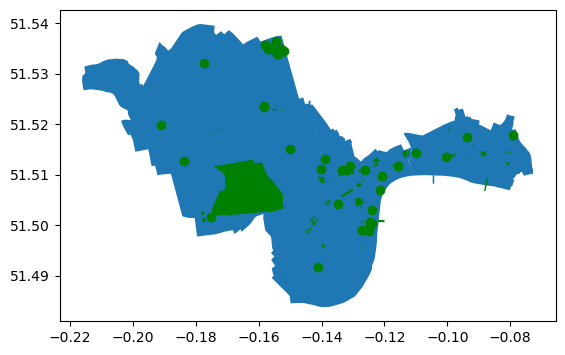

In [23]:
# Specify the area of interest
City = "City of London, England, UK"
Westminster = "Westminster, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(City)
area2 = ox.geocode_to_gdf(Westminster)

base = area.plot()
base2 = area2.plot(ax=base)
base3 = attractionsCity.plot(ax=base2, color='green')
attractionsWest.plot(ax=base3, color='green')

In [25]:
attraction_poly = attractionsWest.loc[attractionsWest.geometry.geometry.type=='Polygon']
attractionsWest["geometry"] = attraction_poly["geometry"].centroid

df_attractionsWest = pd.DataFrame(attractionsWest) 
df_attractionsWest.to_csv('attractionsWest.csv', index=False, sep = ",") 

C:\Users\Anne\AppData\Local\Temp\ipykernel_12224\1957563585.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  attractionsWest["geometry"] = attraction_poly["geometry"].centroid
